# ***`Big Data Cleaning Notebook`***
---
---
---

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # display all columns in pandas dataframe

### `Load & Inspect 4 TikTok Files`
---

In [14]:
d1 = pd.read_pickle("BIG1.pickle")

FileNotFoundError: [Errno 2] No such file or directory: 'JSON_DATABIG1.pickle'

In [ ]:
print(d1.shape)
d1.head(3)

In [ ]:
d2 = pd.read_pickle("Data/chunk_2.pickle")

In [ ]:
print(d2.shape)
d2.head(3)

In [ ]:
d3 = pd.read_pickle("Data/chunk_3.pickle")

In [ ]:
print(d3.shape)
d3.head(3)

In [ ]:
d4 = pd.read_pickle("Data/chunk_4.pickle")

In [ ]:
print(d4.shape)
d4.head(3)

### `Concatenate to one big table:`
---

In [ ]:
data = pd.concat([d1, d2, d3, d4], ignore_index=True)

In [ ]:
print(data.shape)
data.head(3)

### `Write merged data to a file`
---

In [2]:
data.to_pickle("Data/big_dirty.pickle")

NameError: name 'data' is not defined

# ***`Cleaning Process`***
---
---
### 1) `Drop pointless columns`
### 2) `Rename & reorder columns`
### 3) `Check percentage of NaN's for every column (Density)`
### 4) `Data type casting`
### 5) `Detailed investigation of columns`
### 6) `Feature Engineering`
### 7) `Read cleaned Data to file`

In [86]:
data = pd.read_pickle("Data/big_dirty.pickle")
data.shape

(1395847, 96)

## ***`1) Drop Columns`***
---

#### a) Drop all dead columns:

In [87]:
data.dropna(how='all', axis=1, inplace=True)

In [39]:
data.shape # removed 27 dead columns, successfully!

(1395847, 69)

#### b) Drop further pointless columns:

In [6]:
data.head(2)

,id,id_from_provider,content,published_at,inserted_at,last_updated_at,url,provider,topics,images,channel.id,channel.name,language.iso_code,language.name,location.country.iso_code,location.country.name,miv.calculation_values.audience,miv.calculation_values.channel_type_id,miv.calculation_values.content,miv.calculation_values.formula_version,miv.calculation_values.likes,miv.calculation_values.replies,miv.calculation_values.shares,miv.calculation_values.title,miv.calculation_values.views,miv.calculation_values.voice_id,miv.calculation_values.voice_type,miv.value,social.engagement.likes,social.engagement.replies,social.engagement.shares,social.engagement.views,social.hashtags,social.profile.avatar_url,social.profile.favourites_count,social.profile.followers,social.profile.following,social.profile.id,social.profile.name,social.profile.posts_count,social.profile.screen_name,social.profile.url,social.user_mentions,voice.avg_engagement_rate,voice.avg_miv,voice.channel,voice.id,voice.image_url,voice.inserted_at,voice.name,voice.potential_reach,voice.screen_name,voice.type,voice.url,voice.country.iso,voice.country.name,voice.engagement_rate.average,voice.engagement_rate.quartiles,voice.miv.average,brand.id,brand.voice_type,brand.ticker,photo_text_enrichment.category,photo_text_enrichment.storytelling,photo_text_enrichment.prob,brand.name,brand.isActive,brand.industryLabel,brand.parkluBrandName
0,16481952200413205868,7078188176996699394,получилось 😎,2022-03-23T07:05:10.000Z,2022-03-25T08:00:20.000Z,2022-03-25T09:00:22.000Z,https://www.tiktok.com/@innkastar/video/7078188176996699394,purple,[],"[{'thumb_url': None, 'url': 'https://p16-sign-sg.tiktokcdn.com/obj/tos-alisg-p-0037/b975bd47561b41db91f932386559ef05?x-expires=1648184400&x-signature=1d3w6P73brX2Opjo7EErc9cqx9o%3D'}]",41,tiktok,und,Undefined,ru,Russia,10600000,41,получилось 😎,formula::Document::MIV::SocialMedia::V2_5,111200,2794,57,,1000000,None,None,72882.601827,111200,2794,57,1000000,None,https://p16-sign-sg.tiktokcdn.com/musically-maliva-obj/e12135a3d987abeff18510e6ea6a02fb~c5_720x720.jpeg?x-expires=1603544400&x-signature=O2bSvskYUVCEAhOTvaSHicKEVtc%3D,131900000,10600000,33,6614044423573946373,Innkastar,1091,innkastar,https://www.tiktok.com/@innkastar,None,NaN,NaN,tiktok,6614044423573946373,https://p16-sign-sg.tiktokcdn.com/musically-maliva-obj/e12135a3d987abeff18510e6ea6a02fb~c5_720x720.jpeg?x-expires=1603544400&x-signature=O2bSvskYUVCEAhOTvaSHicKEVtc%3D,2020-11-05T09:15:49.000+0000,"""Innka.star""",10600000.0,innkastar,influencer,https://tiktok.com/@innkastar,RU,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16481952250411139961,7077991228100611334,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,2022-03-22T18:20:54.000Z,2022-03-25T08:00:25.000Z,2022-03-25T09:00:27.000Z,https://www.tiktok.com/@emiliomartinez/video/7077991228100611334,purple,[],"[{'thumb_url': None, 'url': 'https://p16-sign-va.tiktokcdn.com/obj/tos-maliva-p-0068/44aacdfc71d44367bb9af7fb24a2ebcd_1647973256?x-expires=1648166400&x-signature=cU8atmdpCDvAl0NTOd2JzsWwdMs%3D'}]",41,tiktok,und,Undefined,es,Spain,15200000,41,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,formula::Document::MIV::SocialMedia::V2_5,46800,741,520,,263200,None,None,39197.267670,46800,741,520,263200,None,https://p77-sign-sg.tiktokcdn.com/musically-maliva-obj/4911769eada39802fa5666db28382c3e~c5_720x720.jpeg?x-expires=1603544400&x-signature=vLORSR2SDvD6bb7hT%2FxvtNMlCf8%3D,731000000,15200000,1037,6688397748901430278,Emilio KEN🦸🏼‍♂️,1210,emiliomartinez,https://www.tiktok.com/@emiliomartinez,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",0.181306,59010.103976,tiktok,6688397748901430278,https://p77-sign-sg.tiktokcdn.com/musically-maliva-obj/4911769eada39802fa5666db28382c3e~c5_720x720.jpeg?x-expires=1603544400&x-signature=vLORSR2SDvD6bb7hT%2FxvtNMlCf8%3D,2020-11-05T09:14:18.000+0000,"Emilio Martinez ""emartineeez""",15000000.0,emiliomartinez,influencer,https://tiktok.com/@emiliomartinez,ES,Spain,0.181306,"[0.16268625, 0.18020293609671847, 

In [88]:

data = data.drop(columns=
                   ['url', 'topics','provider', 'images', 'channel.id', 'channel.name',
                   'language.iso_code', 'language.name', 'location.country.iso_code',
                   'miv.calculation_values.channel_type_id', 'miv.calculation_values.formula_version',
                   'miv.calculation_values.title', 'miv.calculation_values.voice_id', 'social.profile.avatar_url',
                   'social.profile.id', 'social.profile.url', 'voice.channel', 'voice.id', 'voice.image_url',
                   'voice.url'])

# dropped another 20 columns, successfully!

In [5]:
# reverse sort columns for better inspection
data = data.reindex(columns=sorted(data.columns, reverse=True))

In [41]:
data.shape # 20 columns less.

(1395847, 49)

In [23]:
data.head(2)

,voice.type,voice.potential_reach,voice.name,voice.miv.average,voice.inserted_at,voice.engagement_rate.quartiles,voice.engagement_rate.average,voice.country.name,voice.avg_miv,voice.avg_engagement_rate,social.user_mentions,social.profile.screen_name,social.profile.posts_count,social.profile.name,social.profile.following,social.profile.followers,social.profile.favourites_count,social.hashtags,social.engagement.views,social.engagement.shares,social.engagement.replies,social.engagement.likes,published_at,photo_text_enrichment.storytelling,photo_text_enrichment.prob,photo_text_enrichment.category,miv.value,miv.calculation_values.voice_type,miv.calculation_values.views,miv.calculation_values.shares,miv.calculation_values.replies,miv.calculation_values.likes,miv.calculation_values.content,miv.calculation_values.audience,location.country.name,last_updated_at,inserted_at,content,brand.voice_type,brand.ticker,brand.parkluBrandName,brand.name,brand.isActive,brand.industryLabel,brand.id
0,influencer,10600000.0,"""Innka.star""",NaN,2020-11-05T09:15:49.000+0000,NaN,NaN,Russia,NaN,NaN,None,innkastar,1091,Innkastar,33,10600000,131900000,None,1000000,57,2794,111200,2022-03-23T07:05:10.000Z,NaN,NaN,NaN,72882.601827,None,1000000,57,2794,111200,получилось 😎,10600000,Russia,2022-03-25T09:00:22.000Z,2022-03-25T08:00:20.000Z,получилось 😎,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,influencer,15000000.0,"Emilio Martinez ""emartineeez""",59010.103976,2020-11-05T09:14:18.000+0000,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,Spain,59010.103976,0.181306,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",emiliomartinez,1210,Emilio KEN🦸🏼‍♂️,1037,15200000,731000000,None,263200,520,741,46800,2022-03-22T18:20:54.000Z,NaN,NaN,NaN,39197.267670,None,263200,520,741,46800,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,15200000,Spain,2022-03-25T09:00:27.000Z,2022-03-25T08:00:25.000Z,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.head(2)

,voice.type,voice.potential_reach,voice.name,voice.miv.average,voice.inserted_at,voice.engagement_rate.quartiles,voice.engagement_rate.average,voice.country.name,voice.avg_miv,voice.avg_engagement_rate,social.user_mentions,social.profile.screen_name,social.profile.posts_count,social.profile.name,social.profile.following,social.profile.followers,social.profile.favourites_count,social.hashtags,social.engagement.views,social.engagement.shares,social.engagement.replies,social.engagement.likes,published_at,photo_text_enrichment.storytelling,photo_text_enrichment.prob,photo_text_enrichment.category,miv.value,miv.calculation_values.voice_type,miv.calculation_values.views,miv.calculation_values.shares,miv.calculation_values.replies,miv.calculation_values.likes,miv.calculation_values.content,miv.calculation_values.audience,location.country.name,last_updated_at,inserted_at,content,brand.voice_type,brand.ticker,brand.parkluBrandName,brand.name,brand.isActive,brand.industryLabel,brand.id
0,influencer,10600000.0,"""Innka.star""",NaN,2020-11-05T09:15:49.000+0000,NaN,NaN,Russia,NaN,NaN,None,innkastar,1091,Innkastar,33,10600000,131900000,None,1000000,57,2794,111200,2022-03-23T07:05:10.000Z,NaN,NaN,NaN,72882.601827,None,1000000,57,2794,111200,получилось 😎,10600000,Russia,2022-03-25T09:00:22.000Z,2022-03-25T08:00:20.000Z,получилось 😎,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,influencer,15000000.0,"Emilio Martinez ""emartineeez""",59010.103976,2020-11-05T09:14:18.000+0000,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,Spain,59010.103976,0.181306,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",emiliomartinez,1210,Emilio KEN🦸🏼‍♂️,1037,15200000,731000000,None,263200,520,741,46800,2022-03-22T18:20:54.000Z,NaN,NaN,NaN,39197.267670,None,263200,520,741,46800,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,15200000,Spain,2022-03-25T09:00:27.000Z,2022-03-25T08:00:25.000Z,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#data['voice.type'].unique()
data['social.engagement.replies'].isnull().sum(), data['miv.calculation_values.replies'].isnull().sum()

(0, 0)

#### c) Drop further pointless columns

In [89]:
# drop 'em 3rd run
data = data.drop(columns=['voice.screen_name', 'voice.country.iso', 'id_from_provider', 'id', 
                          'miv.calculation_values.views', 'miv.calculation_values.shares', 
                          'miv.calculation_values.replies', 'miv.calculation_values.likes'])

In [9]:
data.shape # 8 columns less.

(1395847, 41)

## ***`2) Rename & Reorder Columns`***
---

#### a) Reorder:

In [13]:
data.head(1)

,voice.type,voice.potential_reach,voice.name,voice.miv.average,voice.inserted_at,voice.engagement_rate.quartiles,voice.engagement_rate.average,voice.country.name,voice.avg_miv,voice.avg_engagement_rate,social.user_mentions,social.profile.screen_name,social.profile.posts_count,social.profile.name,social.profile.following,social.profile.followers,social.profile.favourites_count,social.hashtags,social.engagement.views,social.engagement.shares,social.engagement.replies,social.engagement.likes,published_at,photo_text_enrichment.storytelling,photo_text_enrichment.prob,photo_text_enrichment.category,miv.value,miv.calculation_values.voice_type,miv.calculation_values.content,miv.calculation_values.audience,location.country.name,last_updated_at,inserted_at,content,brand.voice_type,brand.ticker,brand.parkluBrandName,brand.name,brand.isActive,brand.industryLabel,brand.id
0,influencer,10600000.0,"""Innka.star""",NaN,2020-11-05T09:15:49.000+0000,NaN,NaN,Russia,NaN,NaN,None,innkastar,1091,Innkastar,33,10600000,131900000,None,1000000,57,2794,111200,2022-03-23T07:05:10.000Z,NaN,NaN,NaN,72882.601827,None,получилось 😎,10600000,Russia,2022-03-25T09:00:22.000Z,2022-03-25T08:00:20.000Z,получилось 😎,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# What do we have?
data.columns, len(data.columns)

(Index(['voice.type', 'voice.potential_reach', 'voice.name',
        'voice.miv.average', 'voice.inserted_at',
        'voice.engagement_rate.quartiles', 'voice.engagement_rate.average',
        'voice.country.name', 'voice.avg_miv', 'voice.avg_engagement_rate',
        'social.user_mentions', 'social.profile.screen_name',
        'social.profile.posts_count', 'social.profile.name',
        'social.profile.following', 'social.profile.followers',
        'social.profile.favourites_count', 'social.hashtags',
        'social.engagement.views', 'social.engagement.shares',
        'social.engagement.replies', 'social.engagement.likes', 'published_at',
        'photo_text_enrichment.storytelling', 'photo_text_enrichment.prob',
        'photo_text_enrichment.category', 'miv.value',
        'miv.calculation_values.voice_type', 'miv.calculation_values.content',
        'miv.calculation_values.audience', 'location.country.name',
        'last_updated_at', 'inserted_at', 'content', 'brand.voice_t

In [90]:
data = data.reindex(columns=['voice.name', 'social.profile.screen_name', 'social.profile.name','location.country.name',
                             'voice.country.name', 'voice.type', 'voice.potential_reach', 
                             'voice.miv.average', 'voice.inserted_at', 'voice.engagement_rate.quartiles', 
                             'voice.engagement_rate.average', 'voice.avg_miv', 'miv.value','voice.avg_engagement_rate',
                             'published_at', 'last_updated_at', 'inserted_at',
                             'miv.calculation_values.audience', 'miv.calculation_values.voice_type', 'miv.calculation_values.content',
                             'content', 'social.user_mentions', 'social.profile.posts_count', 'social.profile.following', 
                             'social.profile.followers', 'social.profile.favourites_count', 'social.hashtags', 
                             'social.engagement.views', 'social.engagement.shares', 'social.engagement.replies', 
                             'social.engagement.likes', 
                             'brand.voice_type', 'brand.ticker', 'brand.parkluBrandName', 'brand.name', 
                             'brand.isActive', 'brand.industryLabel', 'brand.id',
                             'photo_text_enrichment.storytelling', 'photo_text_enrichment.prob', 'photo_text_enrichment.category'])

In [91]:
len(data.columns) # check that same amount of columns

41

In [26]:
# inspecting the data
data.head(3)

,voice.name,social.profile.screen_name,social.profile.name,location.country.name,voice.country.name,voice.type,voice.potential_reach,voice.miv.average,voice.inserted_at,voice.engagement_rate.quartiles,voice.engagement_rate.average,voice.avg_miv,miv.value,voice.avg_engagement_rate,published_at,last_updated_at,inserted_at,miv.calculation_values.audience,miv.calculation_values.voice_type,miv.calculation_values.content,content,social.user_mentions,social.profile.posts_count,social.profile.following,social.profile.followers,social.profile.favourites_count,social.hashtags,social.engagement.views,social.engagement.shares,social.engagement.replies,social.engagement.likes,brand.voice_type,brand.ticker,brand.parkluBrandName,brand.name,brand.isActive,brand.industryLabel,brand.id,photo_text_enrichment.storytelling,photo_text_enrichment.prob,photo_text_enrichment.category
0,"""Innka.star""",innkastar,Innkastar,Russia,Russia,influencer,10600000.0,NaN,2020-11-05T09:15:49.000+0000,NaN,NaN,NaN,72882.601827,NaN,2022-03-23T07:05:10.000Z,2022-03-25T09:00:22.000Z,2022-03-25T08:00:20.000Z,10600000,None,получилось 😎,получилось 😎,None,1091,33,10600000,131900000,None,1000000,57,2794,111200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Emilio Martinez ""emartineeez""",emiliomartinez,Emilio KEN🦸🏼‍♂️,Spain,Spain,influencer,15000000.0,59010.103976,2020-11-05T09:14:18.000+0000,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,59010.103976,39197.267670,0.181306,2022-03-22T18:20:54.000Z,2022-03-25T09:00:27.000Z,2022-03-25T08:00:25.000Z,15200000,None,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",1210,1037,15200000,731000000,None,263200,520,741,46800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Emilio Martinez ""emartineeez""",emiliomartinez,Emilio KEN🦸🏼‍♂️,Spain,Spain,influencer,15000000.0,59010.103976,2020-11-05T09:14:18.000+0000,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,59010.103976,43151.722349,0.181306,2022-03-23T15:28:30.000Z,2022-03-25T09:00:27.000Z,2022-03-25T08:00:25.000Z,15200000,None,@justboggi,@justboggi,[justboggi],1210,1037,15200000,731000000,None,284000,580,620,55300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Last Drop Columns Inspection:

In [32]:
#data['voice.name'].isnull().sum(), data['social.profile.screen_name'].isnull().sum(), data['social.profile.name'].isnull().sum()  > keep second
#data['miv.calculation_values.voice_type'].isnull().sum()                                                                          > too many NaN's >>> delete!
#data['miv.calculation_values.content'].isnull().sum(), data['content'].isnull().sum()                                              > keep second

#data['brand.voice_type'].unique(), data['voice.type'].unique()                                                                    > keep both for now
#data['brand.voice_type'].isnull().sum(), data['voice.type'].isnull().sum()

#data['brand.ticker'].isnull().sum()                                                                                               > too many NaN's >>> delete!

(array([nan, 'influencer', 'media', 'owned', 'partner', 'celebrity'],
       dtype=object),
 array(['influencer', 'brand', 'media', 'celebrity', nan], dtype=object))

In [43]:
print(data['brand.parkluBrandName'].unique())                                                                    # keep it
data['brand.parkluBrandName'].isnull().sum(), data.shape                                                                                    # keep it

[nan 'Armani Exchange' 'SK-II' 'Anna Sui' 'Anteprima' 'BONDS' 'arena阿瑞娜'
 'Adidas Originals' 'Anya Hindmarch' 'Antipodes' 'Annick Goutal'
 'Natura Bisse' 'MAKE UP FOR EVER' 'Hanes' 'Anne Klein' 'AC9' 'NARS'
 'Physicians Formula' 'Eucerin' 'CALVIN KLEIN' 'Balmain' 'Huda Beauty'
 'Milk Makeup' 'Jeffree Star Cosmetics' 'Fashion Nova' 'Benefit Cosmetics'
 'NAKD' 'Ralph Lauren Fashion' 'BPerfect Cosmetics' 'Dior Fashion'
 'Kayali' 'Oh Polly' 'Bershka' 'Balenciaga' 'Bliss必列斯' 'Adidas'
 'Gucci Fashion' 'Boohoo' 'MANGO' 'Sephora' 'RARE BEAUTY' 'Fendi'
 'Laura Mercier' 'Princess Polly' 'zalando' 'Chanel Fashion' 'Sheglam'
 'Gymshark' 'REM Beauty' 'Walmart' 'Dior' 'Saint Laurent' 'Prada'
 'Farfetch' 'SheIn' 'Maybelline美宝莲' 'Purelei' 'FENTY BEAUTY'
 'Honest Beauty' 'Estee Lauder' 'Steve Madden' 'Amina Muaddi' 'Gussi'
 'Ulta Beauty' 'Zadig & Voltaire' 'Louis Vuitton' 'Old Navy'
 'Vacheron Constantin' 'Viktor Rolf Fragrances' 'BATH & BODY WORKS' 'Snif'
 'PDPAOLA' 'Florasis' 'YSL Beauté' 'ColourPop'

(1384034, (1395847, 41))

In [92]:
data = data.drop(columns=['voice.name', 'social.profile.name',
                          'voice.inserted_at', 'last_updated_at', 'inserted_at',
                          'miv.calculation_values.voice_type', 'miv.calculation_values.content',
                          'brand.ticker', ])

In [94]:
data.head()

,social.profile.screen_name,location.country.name,voice.country.name,voice.type,voice.potential_reach,voice.miv.average,voice.engagement_rate.quartiles,voice.engagement_rate.average,voice.avg_miv,miv.value,voice.avg_engagement_rate,published_at,miv.calculation_values.audience,content,social.user_mentions,social.profile.posts_count,social.profile.following,social.profile.followers,social.profile.favourites_count,social.hashtags,social.engagement.views,social.engagement.shares,social.engagement.replies,social.engagement.likes,brand.voice_type,brand.parkluBrandName,brand.name,brand.isActive,brand.industryLabel,brand.id,photo_text_enrichment.storytelling,photo_text_enrichment.prob,photo_text_enrichment.category
0,innkastar,Russia,Russia,influencer,10600000.0,NaN,NaN,NaN,NaN,72882.601827,NaN,2022-03-23T07:05:10.000Z,10600000,получилось 😎,None,1091,33,10600000,131900000,None,1000000,57,2794,111200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emiliomartinez,Spain,Spain,influencer,15000000.0,59010.103976,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,59010.103976,39197.267670,0.181306,2022-03-22T18:20:54.000Z,15200000,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",1210,1037,15200000,731000000,None,263200,520,741,46800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,emiliomartinez,Spain,Spain,influencer,15000000.0,59010.103976,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,59010.103976,43151.722349,0.181306,2022-03-23T15:28:30.000Z,15200000,@justboggi,[justboggi],1210,1037,15200000,731000000,None,284000,580,620,55300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,emiliomartinez,Spain,Spain,influencer,15000000.0,59010.103976,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,59010.103976,350006.555801,0.181306,2022-03-22T16:11:59.000Z,15200000,con o sin filtro?,None,1210,1037,15200000,731000000,None,8200000,1263,5183,1100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,emiliomartinez,Spain,Spain,influencer,15000000.0,59010.103976,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",0.181306,59010.103976,73040.850737,0.181306,2022-03-24T14:14:47.000Z,15200000,casi casi 😅,None,1210,1037,15200000,731000000,None,587900,242,332,120300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
data = data.drop(columns=['location.country.name','voice.miv.average',
                          'voice.engagement_rate.average',
                          'miv.calculation_values.audience',
                          'brand.voice_type',
                          'brand.parkluBrandName',
                          'voice.engagement_rate.quartiles'])

In [71]:
#data['voice.type'].isnull().sum(), data['brand.voice_type'].isnull().sum()
#data['brand.parkluBrandName'].isnull().sum(), data['brand.name'].isnull().sum()
data['brand.id'].unique()

array([nan, 'amazonfashion', 'tarte', ..., 'maryamnassirzadeh',
       'rolandmouret', 'thewhitecompany'], dtype=object)

<AxesSubplot:>

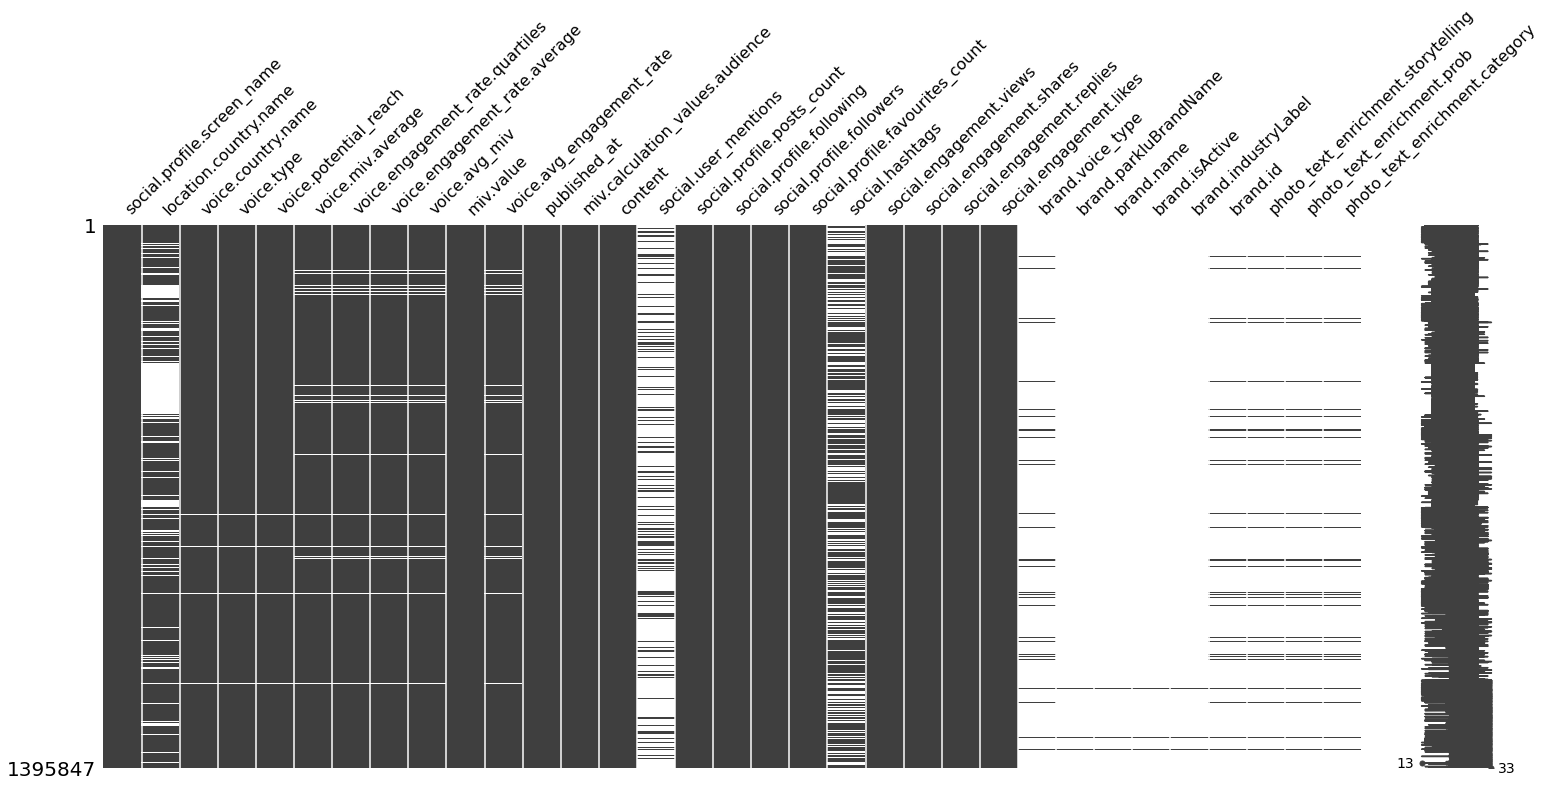

In [50]:
import missingno as msno
msno.matrix(data)

#### Rename Columns:
---

In [97]:
data = data.rename(columns={'social.profile.screen_name': 'name',
                            'voice.country.name': 'country_name',
                            'voice.type': 'voice_type',
                            'voice.potential_reach': 'potential_reach',
                            'voice.engagement_rate.quartiles': 'engagement_rate_quartiles',
                            'voice.avg_miv': 'miv_average',
                            'miv.value': 'miv',
                            'voice.avg_engagement_rate': 'engagement_rate_average',
                            'social.user_mentions': 'user_mentions',
                            'social.profile.posts_count': 'posts_count',
                            'social.profile.following': 'following',
                            'social.profile.followers': 'followers',
                            'social.profile.favourites_count': 'favourites_count',
                            'social.hashtags': 'hashtags',
                            'social.engagement.views': 'views',
                            'social.engagement.shares': 'shares',
                            'social.engagement.replies': 'replies',
                            'social.engagement.likes': 'likes',
                            'brand.name': 'brand_name',
                            'brand.isActive': 'brand_active',
                            'brand.industryLabel': 'industry_label',
                            'brand.id': 'brand_id',
                            'photo_text_enrichment.storytelling': 'pte_storytelling',
                            'photo_text_enrichment.prob': 'pte_prob',
                            'photo_text_enrichment.category': 'pte_category',
                            })

In [69]:
data.dtypes

social.profile.screen_name             object
voice.country.name                     object
voice.type                             object
voice.potential_reach                 float64
voice.engagement_rate.quartiles        object
voice.avg_miv                         float64
miv.value                             float64
voice.avg_engagement_rate             float64
published_at                           object
content                                object
social.user_mentions                   object
social.profile.posts_count              int64
social.profile.following                int64
social.profile.followers                int64
social.profile.favourites_count         int64
social.hashtags                        object
social.engagement.views                 int64
social.engagement.shares                int64
social.engagement.replies               int64
social.engagement.likes                 int64
brand.name                             object
brand.isActive                    

### Final Reorder:
---

In [100]:
len(data.columns)

26

In [99]:
data = data.reindex(columns=['name', 'country_name', 'voice_type','following', 'followers',
                             'potential_reach', 'miv_average', 'engagement_rate_average',
                             'posts_count', 'favourites_count',
                             'published_at', 'content', 'user_mentions', 'hashtags', 
                             'views', 'likes', 'replies' , 'shares', 'miv',
                             'brand_name', 'brand_active', 'industry_label', 'brand_id', 
                             'pte_storytelling', 'pte_prob', 'pte_category'
                             ])

## ***`3) Column Density Investigation`***
---

In [81]:
data[data['name']=='innkastar']['favourites_count'].unique()

array([131900000])

In [101]:
data.head()

,name,country_name,voice_type,following,followers,potential_reach,miv_average,engagement_rate_average,posts_count,favourites_count,published_at,content,user_mentions,hashtags,views,likes,replies,shares,miv,brand_name,brand_active,industry_label,brand_id,pte_storytelling,pte_prob,pte_category
0,innkastar,Russia,influencer,33,10600000,10600000.0,NaN,NaN,1091,131900000,2022-03-23T07:05:10.000Z,получилось 😎,None,None,1000000,111200,2794,57,72882.601827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,731000000,2022-03-22T18:20:54.000Z,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",None,263200,46800,741,520,39197.267670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,731000000,2022-03-23T15:28:30.000Z,@justboggi,[justboggi],None,284000,55300,620,580,43151.722349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,731000000,2022-03-22T16:11:59.000Z,con o sin filtro?,None,None,8200000,1100000,5183,1263,350006.555801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,731000000,2022-03-24T14:14:47.000Z,casi casi 😅,None,None,587900,120300,332,242,73040.850737,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.isnull().sum()

content                                     0
published_at                                0
location.country.name                  320065
miv.calculation_values.audience             0
miv.value                                   0
social.engagement.likes                     0
social.engagement.replies                   0
social.engagement.shares                    0
social.engagement.views                     0
social.hashtags                        520212
social.profile.favourites_count             0
social.profile.followers                    0
social.profile.following                    0
social.profile.posts_count                  0
social.profile.screen_name                  0
social.user_mentions                  1081134
voice.avg_engagement_rate               37457
voice.avg_miv                           37446
voice.potential_reach                    5518
voice.type                               5518
voice.country.name                       6659
voice.engagement_rate.average     

<AxesSubplot:>

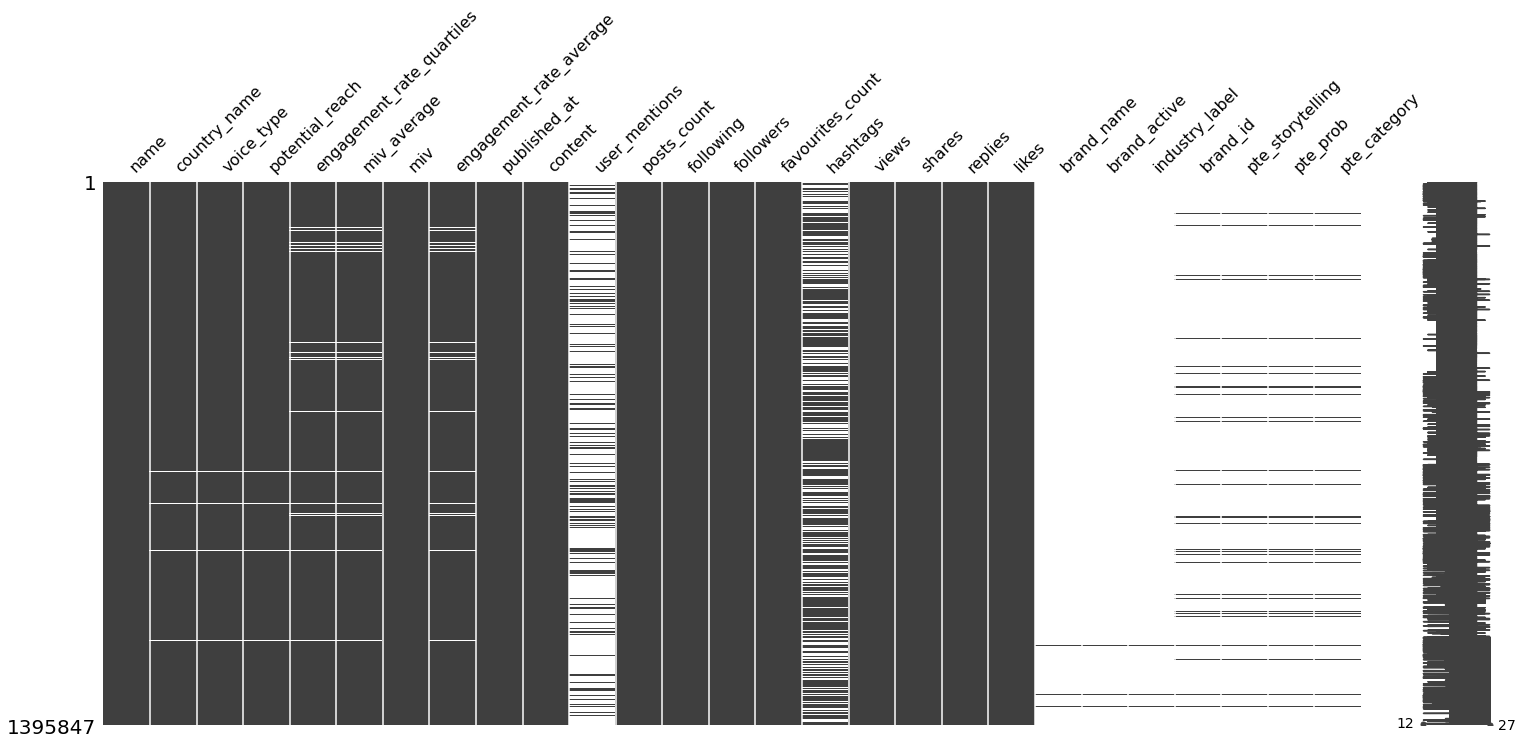

In [74]:
import missingno as msno
msno.matrix(data)

## ***`4) Data Type Casting`***
---

## ***`5) Detailed Column Investigation`***
---

### a) "Are follower amount quasi-constant?"

In [30]:
data[data['social.profile.screen_name']=='emiliomartinez']

,content,published_at,location.country.name,miv.calculation_values.audience,miv.value,social.engagement.likes,social.engagement.replies,social.engagement.shares,social.engagement.views,social.hashtags,social.profile.favourites_count,social.profile.followers,social.profile.following,social.profile.posts_count,social.profile.screen_name,social.user_mentions,voice.avg_engagement_rate,voice.avg_miv,voice.potential_reach,voice.type,voice.country.name,voice.engagement_rate.average,voice.engagement_rate.quartiles,voice.miv.average,brand.id,brand.voice_type,photo_text_enrichment.category,photo_text_enrichment.storytelling,photo_text_enrichment.prob,brand.name,brand.isActive,brand.industryLabel,brand.parkluBrandName
1,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,2022-03-22T18:20:54.000Z,Spain,15200000,39197.267670,46800,741,520,263200,None,731000000,15200000,1037,1210,emiliomartinez,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@justboggi,2022-03-23T15:28:30.000Z,Spain,15200000,43151.722349,55300,620,580,284000,None,731000000,15200000,1037,1210,emiliomartinez,[justboggi],0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,con o sin filtro?,2022-03-22T16:11:59.000Z,Spain,15200000,350006.555801,1100000,5183,1263,8200000,None,731000000,15200000,1037,1210,emiliomartinez,None,0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,casi casi 😅,2022-03-24T14:14:47.000Z,Spain,15200000,73040.850737,120300,332,242,587900,None,731000000,15200000,1037,1210,emiliomartinez,None,0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,we tried,2022-03-11T17:54:11.000Z,Spain,15200000,30678.452324,30900,747,609,159800,None,731000000,15200000,1037,1210,emiliomartinez,None,0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975571,this dance! @XG Official #XG #XG_Mascara,2022-07-08T17:21:37.000Z,Spain,15100000,23649.775133,16600,456,205,147500,"[xg, xg_mascara]",734000000,15100000,1040,1224,emiliomartinez,[XG Official],0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182295,,2022-08-09T17:03:43.000Z,Spain,15000000,88212.072177,150900,644,349,911000,None,736900000,15000000,1061,1234,emiliomartinez,None,0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195795,A year ago… miss you bro @justboggi,2022-08-14T18:08:55.000Z,Spain,15000000,103545.265481,192600,386,248,957000,None,736900000,15000000,1061,1234,emiliomartinez,[justboggi],0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199594,"ya no se que subir, hola Mexico 🇲🇽",2022-08-03T12:58:25.000Z,Spain,15100000,45098.465769,60500,288,215,301000,None,734000000,15100000,1040,1224,emiliomartinez,None,0.181306,59010.103976,15000000.0,influencer,Spain,0.181306,"[0.16268625, 0.18020293609671847, 0.2019164054336468]",59010.103976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data[data['social.profile.screen_name']=='emiliomartinez']['social.profile.followers'].unique()

array([15200000, 15100000, 15000000])

In [32]:
data[data['social.profile.screen_name']=='emiliomartinez']['voice.potential_reach'].unique()

array([15000000.])

## ***`6) Write Cleaned Data to File`***
---


In [85]:
data.head()

,name,country_name,voice_type,following,followers,potential_reach,miv_average,engagement_rate_average,posts_count,favourites_countpublished_at,content,user_mentions,hashtags,views,likes,replies,shares,miv,brand_name,brand_active,industry_label,brand_id,pte_storytelling,pte_prob,pte_category
0,innkastar,Russia,influencer,33,10600000,10600000.0,NaN,NaN,1091,NaN,получилось 😎,None,None,1000000,111200,2794,57,72882.601827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,NaN,uuuuu @ivanmartinez @𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼 @Boggi KEN🦹🏻,"[ivanmartinez, 𝐒𝐭𝐢𝐯𝐞𝐧 𝐊𝐄𝐍🧛🏼, Boggi KEN🦹🏻]",None,263200,46800,741,520,39197.267670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,NaN,@justboggi,[justboggi],None,284000,55300,620,580,43151.722349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,NaN,con o sin filtro?,None,None,8200000,1100000,5183,1263,350006.555801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,emiliomartinez,Spain,influencer,1037,15200000,15000000.0,59010.103976,0.181306,1210,NaN,casi casi 😅,None,None,587900,120300,332,242,73040.850737,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
len(data['name'].unique())

16621

In [102]:
data.to_pickle("Data/big_cleaned.pickle")

Ideas
---


In [110]:
data.columns

Index(['name', 'country_name', 'voice_type', 'following', 'followers',
       'potential_reach', 'miv_average', 'engagement_rate_average',
       'posts_count', 'favourites_count', 'published_at', 'content',
       'user_mentions', 'hashtags', 'views', 'likes', 'replies', 'shares',
       'miv', 'brand_name', 'brand_active', 'industry_label', 'brand_id',
       'pte_storytelling', 'pte_prob', 'pte_category'],
      dtype='object')